In [1]:
import numpy as np
import pandas as pd

from scipy.stats import t

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
ALPHA = 0.002

Datos de la tabla 6.3 del libro de Douglas Montgomery.

Los datos corresponden a las medidas del diámetro (en mm) del pistón del motor de un automóbil.

In [3]:
Datos = pd.read_csv("AutomobileEnginePiston.csv")

In [4]:
DatosSinMuestra = Datos.drop('Muestra', axis=1)

Datos['MuestraNumero']   = DatosSinMuestra.count(axis=1)
Datos['MuestraMedia']    = DatosSinMuestra.mean(axis=1)
Datos['MuestraVarianza'] = DatosSinMuestra.var(axis=1)
Datos['MuestraDesvio']   = DatosSinMuestra.std(axis=1)

In [5]:
# lista en donde guardaremos los limites de control superior e inferior teoricos para la media muestral
UclTeoMediaMuestras, LclTeoMediaMuestras = [], [] 

# lista en donde guardaremos los limites de control superior e inferior empiricos para la media muestral (solo a manera de comparacion entre el resultado teorico y el muestral)
UclEmpMediaMuestras, LclEmpMediaMuestras = [], []

# lista en donde guardaremos los limites de control superior e inferior empiricos para el desvío muestral
UclEmpDesvioMuestras, LclEmpDesvioMuestras = [], []

Control estadístico de procesos bayesiano

In [6]:
# inicializamos nuestros parámetros partiendo de una previa no informativa
kappa, mu, nu, sigma2 = 0, 0, -1, 0

M = 10**4 # numero de muestras a simular para la estimacion empirica de los limites de control

for i in range(len(Datos)):

    # para cada muestra actualizamos los parametros
    YBar = Datos.iloc[i]['MuestraMedia']
    n     = int(Datos.iloc[i]['MuestraNumero'])
    S2    = Datos.iloc[i]['MuestraVarianza']

    # actualizamos los parametros con cada nueva muestra
    kappa_new  = # TRABAJO POR HACER
    mu_new     = # TRABAJO POR HACER
    nu_new     = # TRABAJO POR HACER
    sigma2_new = # TRABAJO POR HACER

    kappa, mu, nu, sigma2 = kappa_new, mu_new, nu_new, sigma2_new

    # calculamos los limites de control teoricos para la media del proceso
    UclTeoMediaMuestra = mu + np.sqrt(1/n) * t.ppf(1-ALPHA/2, nu) # * ------- TRABAJO POR HACER (completar la expresion)
    LclTeoMediaMuestra = mu - np.sqrt(1/n) * t.ppf(1-ALPHA/2, nu) # * ------- TRABAJO POR HACER (completar la expresion)

    # simulamos M muestras del mismo tamaño que la muestra observada
    YMuestra = t.rvs(size=n*M, df=nu, loc=mu, scale=np.sqrt((1+kappa)/kappa*sigma2)).reshape(n,10**4)

    # media empirica y desviacion empirica para la media del proceso
    YBarMuestra = np.mean(YMuestra, axis=0)
    YBarBar = YBarMuestra.mean()
    YBarStd = YBarMuestra.std()

    # calculamos los limites de control empiricos para la media del proceso
    UclEmpMediaMuestra = YBarBar + YBarStd * t.ppf(1-ALPHA/2, nu)
    LclEmpMediaMuestra = YBarBar - YBarStd * t.ppf(1-ALPHA/2, nu)    

    # media empirica y desviacion empirica para la desviacion del proceso
    SMuestra = np.std(YMuestra, axis=0)
    SBar = SMuestra.mean()
    SStd = SMuestra.std()

    # calculamos los limites de control empiricos para el desvio del proceso
    UclEmpDesvioMuestra = SBar + 3 * SStd
    LclEmpDesvioMuestra = max(SBar - 3 * SStd, 0)
    
    # agregamos los limites de control a nuestras listas
    UclTeoMediaMuestras.append(UclTeoMediaMuestra)
    LclTeoMediaMuestras.append(LclTeoMediaMuestra)

    UclEmpMediaMuestras.append(UclEmpMediaMuestra)
    LclEmpMediaMuestras.append(LclEmpMediaMuestra)

    UclEmpDesvioMuestras.append(UclEmpDesvioMuestra)
    LclEmpDesvioMuestras.append(LclEmpDesvioMuestra)


Agregamos los limites de control a los datos

In [7]:
Datos['UclTeoMediaMuestras'] = UclTeoMediaMuestras
Datos['LclTeoMediaMuestras'] = LclTeoMediaMuestras

Datos['UclEmpMediaMuestras'] = UclEmpMediaMuestras
Datos['LclEmpMediaMuestras'] = LclEmpMediaMuestras

Datos['UclEmpDesvioMuestras'] = UclEmpDesvioMuestras
Datos['LclEmpDesvioMuestras'] = LclEmpDesvioMuestras

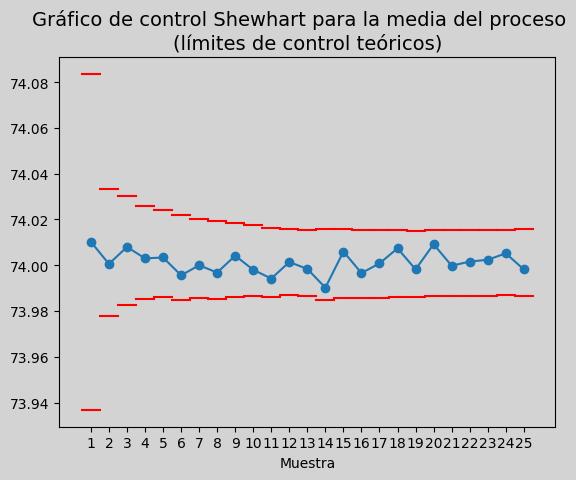

In [15]:
fig, ax = plt.subplots(facecolor='lightgrey')

plt.plot(Datos['Muestra'], Datos['MuestraMedia'], marker='o')

for i in Datos['Muestra']:

    plt.plot([i-0.5, i+0.5], [Datos.loc[Datos['Muestra']==i, 'UclTeoMediaMuestras'].values[0]]*2, color='r')
    plt.plot([i-0.5, i+0.5], [Datos.loc[Datos['Muestra']==i, 'LclTeoMediaMuestras'].values[0]]*2, color='r')

plt.suptitle("Gráfico de control Shewhart para la media del proceso", fontsize=14)
plt.title("(límites de control teóricos)", fontsize=14)

plt.xlabel('Muestra')
ax.set_xticks(Datos['Muestra'])
ax.set_facecolor('lightgrey')

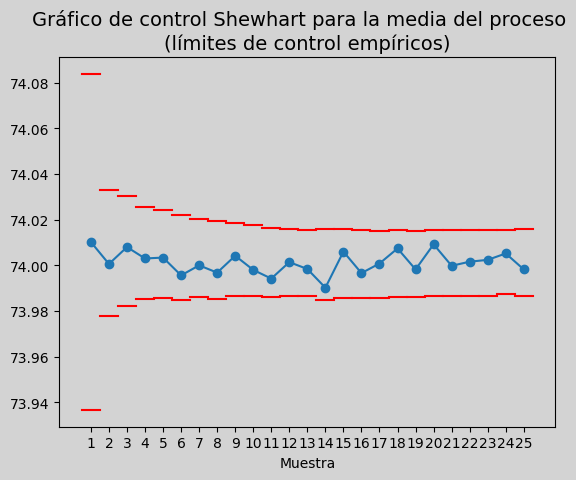

In [16]:
fig, ax = plt.subplots(facecolor='lightgrey')

plt.plot(Datos['Muestra'], Datos['MuestraMedia'], marker='o')

for i in Datos['Muestra']:

    plt.plot([i-0.5, i+0.5], [Datos.loc[Datos['Muestra']==i, 'UclEmpMediaMuestras'].values[0]]*2, color='r')
    plt.plot([i-0.5, i+0.5], [Datos.loc[Datos['Muestra']==i, 'LclEmpMediaMuestras'].values[0]]*2, color='r')

plt.suptitle("Gráfico de control Shewhart para la media del proceso", fontsize=14)
plt.title("(límites de control empíricos)", fontsize=14)

plt.xlabel('Muestra')
ax.set_xticks(Datos['Muestra'])
ax.set_facecolor('lightgrey')

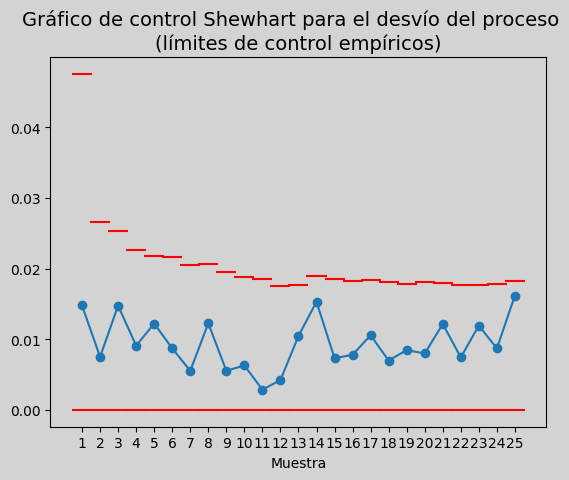

In [19]:
fig, ax = plt.subplots(facecolor='lightgrey')

plt.plot(Datos['Muestra'], Datos['MuestraDesvio'], marker='o')

for i in Datos['Muestra']:

    plt.plot([i-0.5, i+0.5], [Datos.loc[Datos['Muestra']==i, 'UclEmpDesvioMuestras'].values[0]]*2, color='r')
    plt.plot([i-0.5, i+0.5], [Datos.loc[Datos['Muestra']==i, 'LclEmpDesvioMuestras'].values[0]]*2, color='r')

plt.suptitle("Gráfico de control Shewhart para el desvío del proceso", fontsize=14)
plt.title("(límites de control empíricos)", fontsize=14)

plt.xlabel('Muestra')
ax.set_xticks(Datos['Muestra'])
ax.set_facecolor('lightgrey')